### 本案例是针对groupby方法的练习案例，groupby方法讲解见Lesson6
  - 读取1880-2106年数据时，使用了concat()方法将各年数据整合为一张表
  - 本练习包含可视化练习，使用matplotlib

In [22]:
import pandas as pd

#读取1880-2016年婴儿姓名使用信息，由于信息表按年统计，因此需要将多年数据整合到一张表中
years=range(1880,2017)
columns=["name","gender","frequency"]
pieces=[] #用于存储循环读取的每一年的数据

#使用循环读取每年数据，并将各年数据都存入pieces中,pieces列表的各元素表示各年的数据
for year in years:
    path="/Users/dengsudden/Documents/python_course/names/yob%d.txt" %year
    frame=pd.read_csv(path,names=columns)
    frame["year"]=year
    pieces.append(frame)

#中pieces列表中填入各年数据后，需要使用concat方法将pieces各元素整合在一起
baby_names=pd.concat(pieces,ignore_index=True)

print(baby_names.info())
baby_names.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891894 entries, 0 to 1891893
Data columns (total 4 columns):
name         object
gender       object
frequency    int64
year         int64
dtypes: int64(2), object(2)
memory usage: 57.7+ MB
None


,name,gender,frequency,year
1891889,Zolton,M,5,2016
1891890,Zurich,M,5,2016
1891891,Zyahir,M,5,2016
1891892,Zyel,M,5,2016
1891893,Zylyn,M,5,2016


In [32]:
#小小练习一下，用groupby统计每年出生的男女婴儿数
#如果要同时按几列来分组，需要使用[]
baby_names.groupby(["year","gender"]).size()

year  gender
1880  F           942
      M          1058
1881  F           938
      M           997
1882  F          1028
      M          1099
1883  F          1054
      M          1030
1884  F          1172
      M          1125
1885  F          1197
      M          1097
1886  F          1282
      M          1110
1887  F          1306
      M          1067
1888  F          1474
      M          1177
1889  F          1479
      M          1111
1890  F          1534
      M          1161
1891  F          1533
      M          1127
1892  F          1661
      M          1260
1893  F          1652
      M          1179
1894  F          1702
      M          1239
                ...  
2002  F         18080
      M         12480
2003  F         18427
      M         12753
2004  F         18825
      M         13220
2005  F         19181
      M         13362
2006  F         20047
      M         14032
2007  F         20558
      M         14388
2008  F         20454
      M         146

### 统计不同年份、不同性别中，各名字出现次数所占分组名字出现次数的比例

In [34]:
#先自定义函数，统计分组中各名字占比
def add_pct(group):
    group["pct"]=group.frequency/group.frequency.sum()*100
    return group

baby_names=baby_names.groupby(["year","gender"]).apply(add_pct)
baby_names.head()

,name,gender,frequency,year,pct
0,Mary,F,7065,1880,7.764419
1,Anna,F,2604,1880,2.861790
2,Emma,F,2003,1880,2.201292
3,Elizabeth,F,1939,1880,2.130957
4,Minnie,F,1746,1880,1.918850


#### 增加一个变量ranked，表示各年份性别分组下，各名字在分组中出现频率的排名

In [35]:
baby_names["ranked"]=baby_names.groupby(["year","gender"])["frequency"].rank(ascending=False)
baby_names.head()

,name,gender,frequency,year,pct,ranked
0,Mary,F,7065,1880,7.764419,1.0
1,Anna,F,2604,1880,2.861790,2.0
2,Emma,F,2003,1880,2.201292,3.0
3,Elizabeth,F,1939,1880,2.130957,4.0
4,Minnie,F,1746,1880,1.918850,5.0


### 可视化-每年最流行的男孩女孩名字使用次数所占当年出生男孩女孩总数百分比的变化趋势
  - matplotlib画出各年rank1的名字占比变化情况

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [37]:
#布尔索引选取数据中的男孩女孩
dfm=baby_names[baby_names.gender=="M"]
dff=baby_names[baby_names.gender=="F"]

In [43]:
#每年最流行的男孩名字
rank1m=dfm[dfm.ranked==1]
rank1m.head()

,name,gender,frequency,year,pct,ranked
942,John,M,9655,1880,8.738268,1.0
2938,John,M,8769,1881,8.704327,1.0
4963,John,M,9557,1882,8.406488,1.0
7116,John,M,8894,1883,8.500674,1.0
9318,John,M,9388,1884,8.203210,1.0


In [41]:
#每年最流行的女孩名字
rank1f=dff[dff.ranked==1]
rank1f.head()

,name,gender,frequency,year,pct,ranked
0,Mary,F,7065,1880,7.764419,1.0
2000,Mary,F,6919,1881,7.524496,1.0
3935,Mary,F,8148,1882,7.555148,1.0
6062,Mary,F,8012,1883,7.133318,1.0
8146,Mary,F,9217,1884,7.143854,1.0


### 绘制折线图

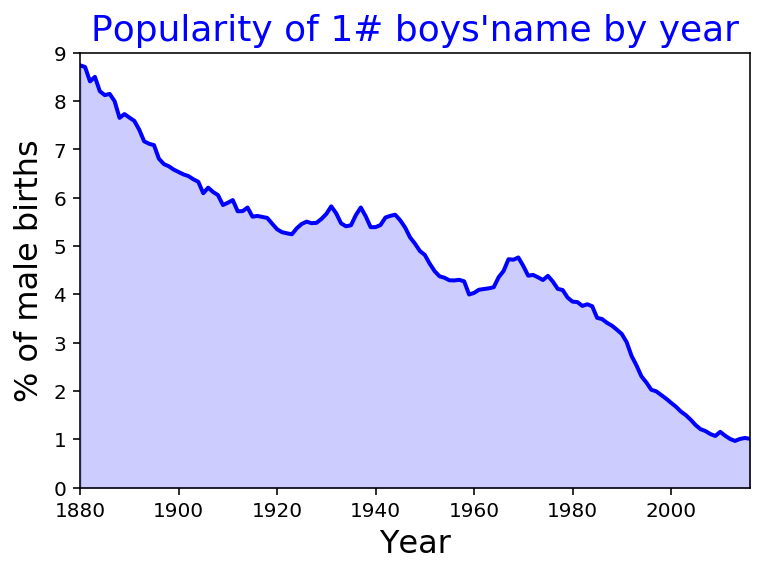

In [50]:
#绘制折线图
plt.plot(rank1m.year,rank1m.pct,color="blue",linewidth=2)

#plt.fill_between设置填充线与坐标轴之间的空间
plt.fill_between(rank1m.year,rank1m.pct,color="blue",alpha=0.2)

#设置坐标轴区间范围
plt.xlim(1880,2016)
plt.ylim(0,9)

#美化图：给图添加标题，调整字体大小等
plt.title("Popularity of 1# boys'name by year",size=18,color="blue")
plt.xlabel("Year",size=16)
plt.ylabel("% of male births",size=16)

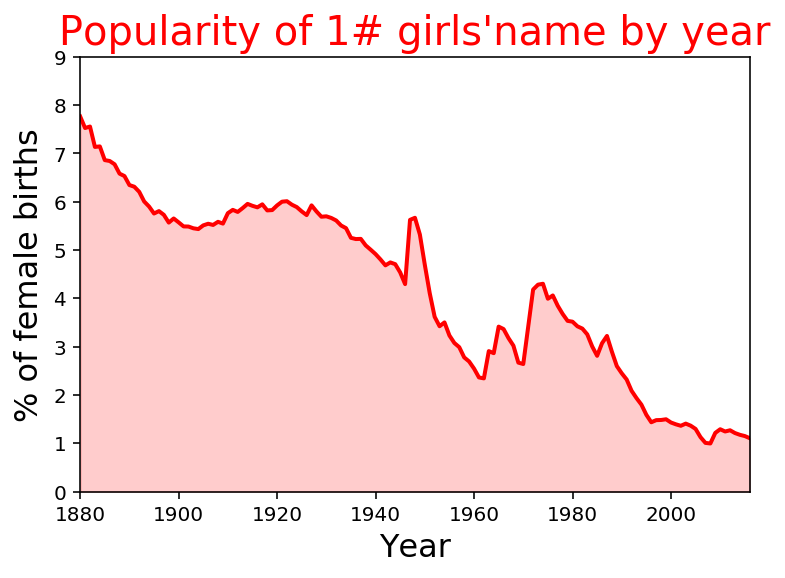

In [55]:
plt.plot(rank1f.year,rank1f.pct,color="red",linewidth=2)
plt.fill_between(rank1f.year,rank1f.pct,color="red",alpha=0.2)
plt.xlim(1880,2016)
plt.ylim(0,9)
plt.title("Popularity of 1# girls'name by year",size=20,color="red")
plt.xlabel("Year",size=16)
plt.ylabel("% of female births",size=16)

#### 根据以上输出结果，我们发现，不论是男孩还是女孩，每年最流行的名字所占当年分组出生人数比例都在下降
  - 说明民众的思想更加自主，越来越个性化
  - 还有一个原因可能是每年可选择的姓名数越来越多了，下面我们用统计结果来证明
      - 思路：按年份、性别分组，统计各分组下的姓名数量，然后根据按年份，绘制不同性别各年度可选姓名数量的趋势图

In [64]:
name_count=baby_names.groupby(["year","gender"]).size() #.size()返回一个series
#使用to_frame将series转换为dataframe
name_count=name_count.to_frame(name="name_count").reset_index()
name_count.head()

,year,gender,name_count
0,1880,F,942
1,1880,M,1058
2,1881,F,938
3,1881,M,997
4,1882,F,1028


In [62]:
name_countm=name_count[name_count.gender=="M"]
name_countf=name_count[name_count.gender=="F"]
name_countm.head()

,year,gender,name_count
1,1880,M,1058
3,1881,M,997
5,1882,M,1099
7,1883,M,1030
9,1884,M,1125


### 绘制男孩女孩各年名字数量趋势图

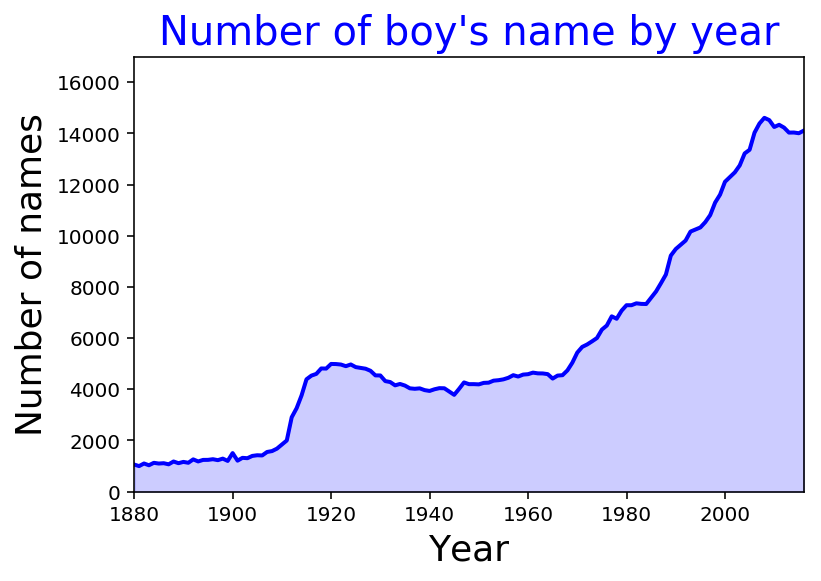

In [70]:
plt.plot(name_countm.year,name_countm.name_count,color="blue",linewidth=2)
plt.fill_between(name_countm.year,name_countm.name_count,color="blue",alpha=0.2)
plt.xlim(1880,2016)
plt.ylim(0,17000)
plt.title("Number of boy's name by year",size=20,color="blue")
plt.xlabel("Year",size=18)
plt.ylabel("Number of names",size=18)

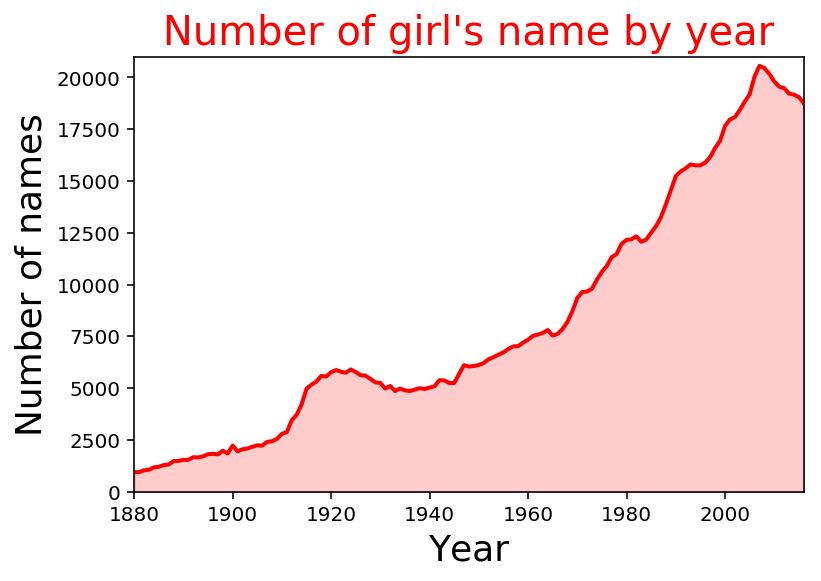

In [72]:
plt.plot(name_countf.year,name_countf.name_count,color="red",linewidth=2)
plt.fill_between(name_countf.year,name_countf.name_count,color="red",alpha=0.2)
plt.xlim(1880,2016)
plt.ylim(0,21000)
plt.title("Number of girl's name by year",size=20,color="red")
plt.xlabel("Year",size=18)
plt.ylabel("Number of names",size=18)

#### 以上验证可以看到，不论男女，可选名字数量逐年递增，这可能也是导致每年最流行的名字占比当年出生人口比例逐年下降的因素之一。

### 作业
  - 分别找出2015, 2016年最流行的前10个男孩和女孩名字
    - 思路：
    - groupby().apply()，
    - 使用ranked列，取ranked值小于11的数据
    - 或者使用sort_values()方法对pct列大小排序，取最大的10行数据

In [85]:
#sort_values方法

#先将男女分组
baby_namesm=baby_names[baby_names.gender=="M"]
baby_namesf=baby_names[baby_names.gender=="F"]

bm1516=baby_namesm[baby_namesm.year>2014]
bm1516.sort_values(by="pct")[-10:]

,name,gender,frequency,year,pct,ranked
1845022,Ethan,M,15049,2015,0.789058,6.0
1877786,Mason,M,15192,2016,0.807796,4.0
1845021,William,M,15863,2015,0.831738,5.0
1877785,William,M,15668,2016,0.833106,3.0
1845020,Jacob,M,15914,2015,0.834412,4.0
1845019,Mason,M,16591,2015,0.869909,3.0
1845018,Liam,M,18330,2015,0.961089,2.0
1877784,Liam,M,18138,2016,0.964441,2.0
1877783,Noah,M,19015,2016,1.011074,1.0
1845017,Noah,M,19594,2015,1.027364,1.0


In [84]:
#通过ranked筛选方法

bm=bm1516[bm1516.ranked<=10]
bm

,name,gender,frequency,year,pct,ranked
1845017,Noah,M,19594,2015,1.027364,1.0
1845018,Liam,M,18330,2015,0.961089,2.0
1845019,Mason,M,16591,2015,0.869909,3.0
1845020,Jacob,M,15914,2015,0.834412,4.0
1845021,William,M,15863,2015,0.831738,5.0
1845022,Ethan,M,15049,2015,0.789058,6.0
1845023,James,M,14773,2015,0.774587,7.0
1845024,Alexander,M,14507,2015,0.760639,8.0
1845025,Michael,M,14396,2015,0.754819,9.0
1845026,Benjamin,M,13670,2015,0.716753,10.0
